In [8]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp

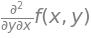

In [9]:
x,y = sp.symbols('x y')
f = sp.Function('f')(x,y)
f.diff(x,y)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

explicit check:  0.101
(1, 101, 1)
(101, 101)


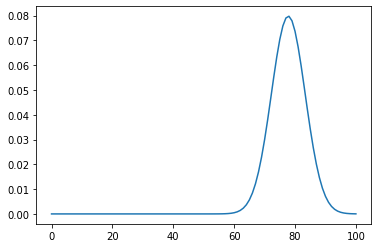

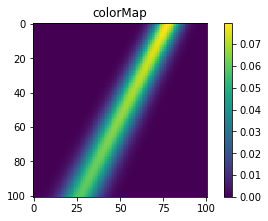

In [12]:
# Ut +vUx = 0 , 1-D advection equation
'''
x is restricted to the computation domain if (0,1)
v is a constant and U = U(x,t)
IC is give as:
U(0,x) = f(x), 0<=x<=1
let f(x) be exp(5x)

'''

v= -5.1
start_x = 0
stop_x = 100
grid_x = 101
start_t = 0
stop_t = 10
grid_t = 101
x = np.array([np.linspace(start_x,stop_x,grid_x,endpoint=True)])
t = np.array([np.linspace(start_t,stop_t,grid_t,endpoint=True)])
delta_t = ((stop_t-start_t)/grid_t)
delta_x = ((stop_x-start_x)/grid_x)
explicit_check =delta_t/pow(delta_x,2)  # should beess than 0.5 for oo xpicit soion or e crank-nicholson metho
fx = (1/(5*pow((2*np.pi),0.5)))*(np.exp(-pow((0.9*x-70),2)/(2*25)))

u = np.array([np.zeros((grid_t,grid_x),dtype=float)])
u = np.reshape(u,(101,101,1))
u[0,:,0] = np.reshape(np.array([fx]),(1,101))
plt.plot(x.T,u[0,:,0])
for n in range((t.shape[1])-1):
    for k in range((x.shape[1])-1):
        u[n+1,k] = u[n,k]-v*(delta_t/delta_x)*(u[n,k+1]-u[n,k])

print("explicit check: ",explicit_check)
print(u[0:1,:,:].shape)
u= np.reshape(u,(101,101))
print(u.shape)

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(u)
ax.set_aspect('equal')
plt.colorbar(orientation='vertical')

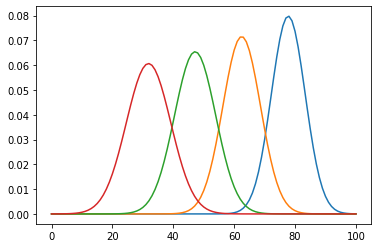

In [13]:
for i in range(0,100,30):
    plt.plot(x.T,u[i,:])